In [1]:
import torch
import argparse
import matplotlib.pyplot as plt
from train import *

In [2]:
parser = argparse.ArgumentParser()

# Model params
parser.add_argument(
        "--input_length", type=int, default=19, help="Length of an input sequence"
    )
parser.add_argument(
    "--input_dim", type=int, default=1, help="Dimensionality of input sequence"
)
parser.add_argument(
    "--num_classes", type=int, default=10, help="Dimensionality of output sequence"
)
parser.add_argument(
    "--num_hidden",
    type=int,
    default=128,
    help="Number of hidden units in the model",
)
parser.add_argument(
    "--batch_size",
    type=int,
    default=128,
    help="Number of examples to process in a batch",
)
parser.add_argument(
    "--learning_rate", type=float, default=0.001, help="Learning rate"
)
parser.add_argument(
    "--max_epoch", type=int, default=100, help="Number of epochs to run for"
)
parser.add_argument("--max_norm", type=float, default=10.0)
parser.add_argument(
    "--data_size", type=int, default=1000000, help="Size of the total dataset"
)
parser.add_argument(
    "--portion_train",
    type=float,
    default=0.8,
    help="Portion of the total dataset used for training",
)

config, unknown = parser.parse_known_args()

In [3]:
def draw_eval(args, steps, train_acc, train_loss, val_acc, val_loss, model):
    plt.figure(1, figsize=(20, 5))
    plt.subplot(121)
    plt.plot(steps, train_acc, 'r', label='Train Acc')
    plt.plot(steps, val_acc, 'b', label='Val Acc')
    plt.legend()
    plt.xlabel("Step")
    plt.ylabel("Accuracy")
    plt.title(f"{model} Training with length {args.input_length}")

    plt.subplot(122)
    plt.plot(steps, train_loss, 'r', label='Train Loss')
    plt.plot(steps, val_loss, 'b', label='Val Loss')
    plt.legend()
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title(f"{model} Training with length {args.input_length}")
    
    plt.show()

[0/13] Loss: 2.398627 (2.398627) Accuracy: 0.078125 (0.078125)
[10/13] Loss: 2.280052 (2.394761) Accuracy: 0.156250 (0.113636)
[0/4] Loss: 2.372616 (2.372616) Accuracy: 0.093750 (0.093750)
[0/13] Loss: 2.352585 (2.352585) Accuracy: 0.109375 (0.109375)
[10/13] Loss: 2.269325 (2.328366) Accuracy: 0.140625 (0.110795)
[0/4] Loss: 2.343136 (2.343136) Accuracy: 0.109375 (0.109375)
[0/13] Loss: 2.314289 (2.314289) Accuracy: 0.125000 (0.125000)
[10/13] Loss: 2.264766 (2.313678) Accuracy: 0.156250 (0.115767)
[0/4] Loss: 2.327423 (2.327423) Accuracy: 0.101562 (0.101562)
[0/13] Loss: 2.298552 (2.298552) Accuracy: 0.117188 (0.117188)
[10/13] Loss: 2.246232 (2.297759) Accuracy: 0.164062 (0.122159)
[0/4] Loss: 2.285523 (2.285523) Accuracy: 0.085938 (0.085938)
[0/13] Loss: 2.272115 (2.272115) Accuracy: 0.132812 (0.132812)
[10/13] Loss: 2.137711 (2.231346) Accuracy: 0.273438 (0.167614)
[0/4] Loss: 2.089217 (2.089217) Accuracy: 0.226562 (0.226562)
[0/13] Loss: 2.139137 (2.139137) Accuracy: 0.171875 (0.

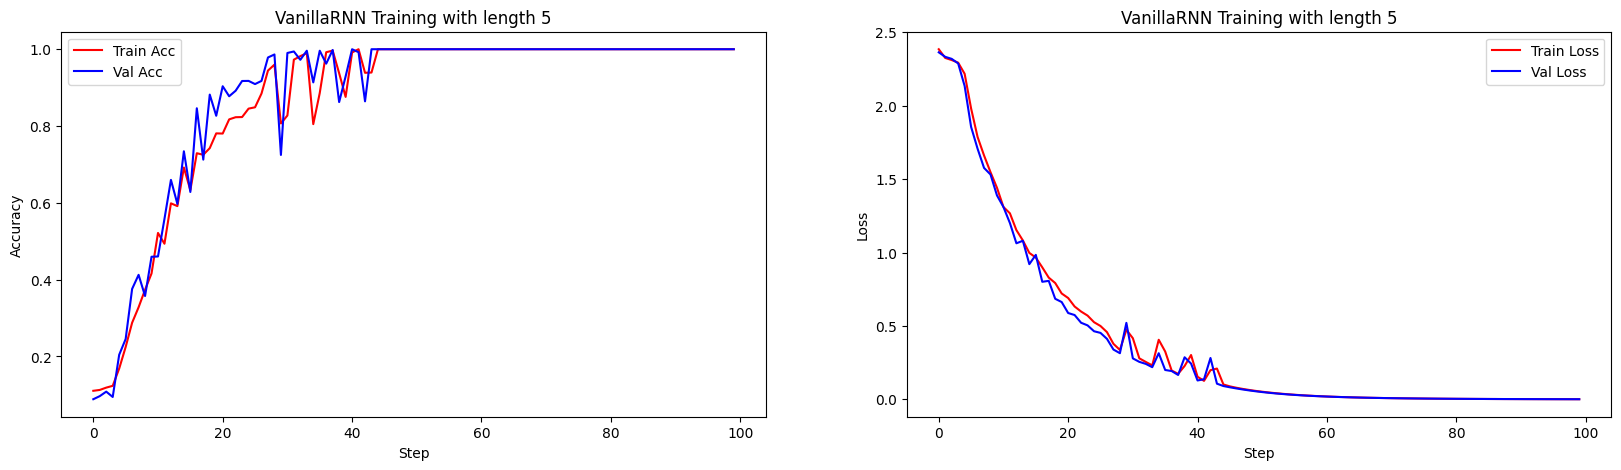

[0/13] Loss: 2.315553 (2.315553) Accuracy: 0.132812 (0.132812)
[10/13] Loss: 2.192274 (2.284510) Accuracy: 0.195312 (0.147727)
[0/4] Loss: 2.173452 (2.173452) Accuracy: 0.171875 (0.171875)
[0/13] Loss: 2.140579 (2.140579) Accuracy: 0.257812 (0.257812)
[10/13] Loss: 1.671420 (1.951589) Accuracy: 0.359375 (0.274148)
[0/4] Loss: 1.790372 (1.790372) Accuracy: 0.218750 (0.218750)
[0/13] Loss: 1.723847 (1.723847) Accuracy: 0.312500 (0.312500)
[10/13] Loss: 1.324203 (1.515648) Accuracy: 0.468750 (0.393466)
[0/4] Loss: 1.578604 (1.578604) Accuracy: 0.296875 (0.296875)
[0/13] Loss: 1.475220 (1.475220) Accuracy: 0.343750 (0.343750)
[10/13] Loss: 1.105735 (1.212666) Accuracy: 0.601562 (0.553977)
[0/4] Loss: 1.159332 (1.159332) Accuracy: 0.468750 (0.468750)
[0/13] Loss: 1.034298 (1.034298) Accuracy: 0.570312 (0.570312)
[10/13] Loss: 0.909411 (1.022111) Accuracy: 0.656250 (0.615767)
[0/4] Loss: 0.974261 (0.974261) Accuracy: 0.640625 (0.640625)
[0/13] Loss: 0.840343 (0.840343) Accuracy: 0.765625 (0.

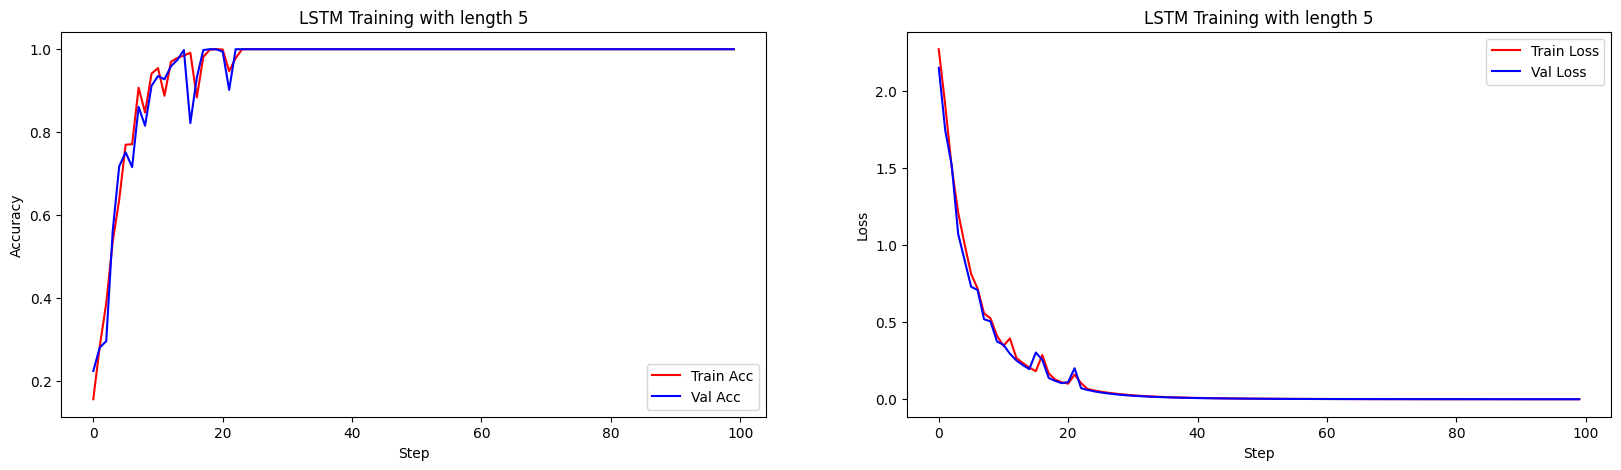

In [4]:
config.input_length = 5

model = 'VanillaRNN'
train_acces, train_losses, val_acces, val_losses = main(config, 'cuda', model)
steps = [i for i in range(len(train_acces))]
draw_eval(config, steps, train_acces, train_losses, val_acces, val_losses, model)

model = 'LSTM'
train_acces, train_losses, val_acces, val_losses = main(config, 'cuda', model)
steps = [i for i in range(len(train_acces))]
draw_eval(config, steps, train_acces, train_losses, val_acces, val_losses, model)

[0/13] Loss: 2.453623 (2.453623) Accuracy: 0.101562 (0.101562)
[10/13] Loss: 2.304790 (2.397847) Accuracy: 0.101562 (0.102983)
[0/4] Loss: 2.369666 (2.369666) Accuracy: 0.109375 (0.109375)
[0/13] Loss: 2.379139 (2.379139) Accuracy: 0.101562 (0.101562)
[10/13] Loss: 2.296297 (2.322474) Accuracy: 0.101562 (0.095881)
[0/4] Loss: 2.350763 (2.350763) Accuracy: 0.101562 (0.101562)
[0/13] Loss: 2.340908 (2.340908) Accuracy: 0.117188 (0.117188)
[10/13] Loss: 2.291401 (2.308340) Accuracy: 0.101562 (0.102983)
[0/4] Loss: 2.343744 (2.343744) Accuracy: 0.093750 (0.093750)
[0/13] Loss: 2.322889 (2.322889) Accuracy: 0.101562 (0.101562)
[10/13] Loss: 2.287422 (2.300050) Accuracy: 0.101562 (0.112216)
[0/4] Loss: 2.341282 (2.341282) Accuracy: 0.101562 (0.101562)
[0/13] Loss: 2.311041 (2.311041) Accuracy: 0.109375 (0.109375)
[10/13] Loss: 2.283825 (2.293674) Accuracy: 0.117188 (0.120739)
[0/4] Loss: 2.341158 (2.341158) Accuracy: 0.117188 (0.117188)
[0/13] Loss: 2.301818 (2.301818) Accuracy: 0.117188 (0.

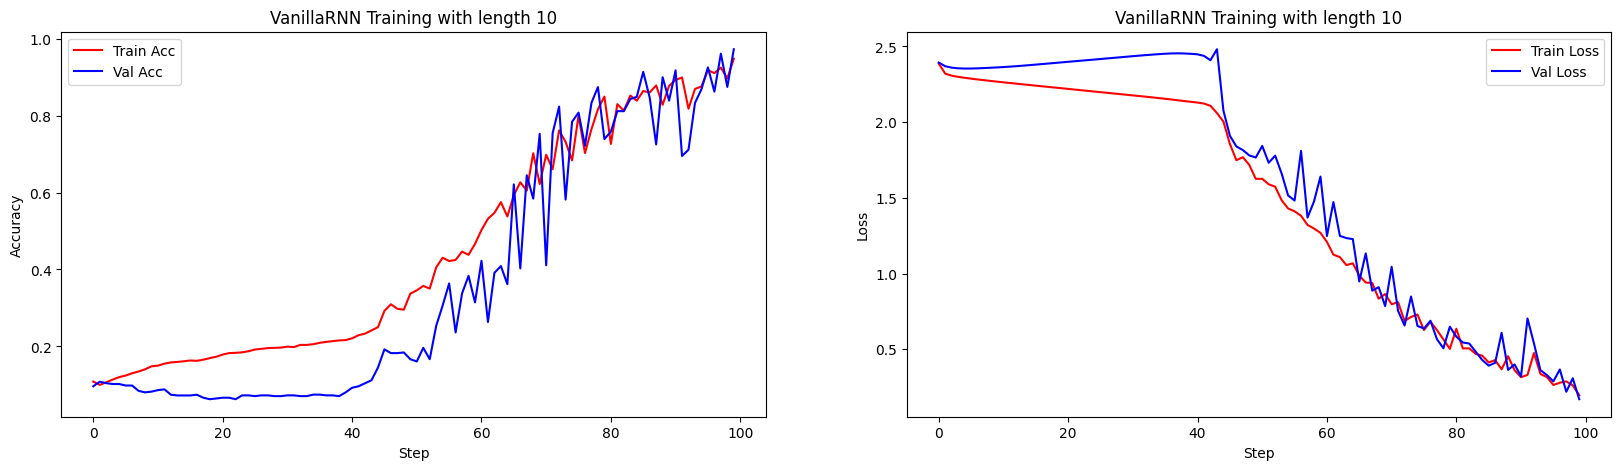

[0/13] Loss: 2.386225 (2.386225) Accuracy: 0.062500 (0.062500)
[10/13] Loss: 2.304180 (2.327373) Accuracy: 0.140625 (0.091619)
[0/4] Loss: 2.295631 (2.295631) Accuracy: 0.148438 (0.148438)
[0/13] Loss: 2.282428 (2.282428) Accuracy: 0.140625 (0.140625)
[10/13] Loss: 2.203610 (2.264938) Accuracy: 0.187500 (0.142045)
[0/4] Loss: 2.128823 (2.128823) Accuracy: 0.210938 (0.210938)
[0/13] Loss: 2.110997 (2.110997) Accuracy: 0.187500 (0.187500)
[10/13] Loss: 1.905458 (2.028541) Accuracy: 0.218750 (0.197443)
[0/4] Loss: 1.932920 (1.932920) Accuracy: 0.250000 (0.250000)
[0/13] Loss: 1.881357 (1.881357) Accuracy: 0.226562 (0.226562)
[10/13] Loss: 1.752701 (1.772803) Accuracy: 0.296875 (0.260653)
[0/4] Loss: 1.587635 (1.587635) Accuracy: 0.382812 (0.382812)
[0/13] Loss: 1.598681 (1.598681) Accuracy: 0.429688 (0.429688)
[10/13] Loss: 1.578436 (1.613583) Accuracy: 0.289062 (0.318182)
[0/4] Loss: 1.443748 (1.443748) Accuracy: 0.484375 (0.484375)
[0/13] Loss: 1.455037 (1.455037) Accuracy: 0.390625 (0.

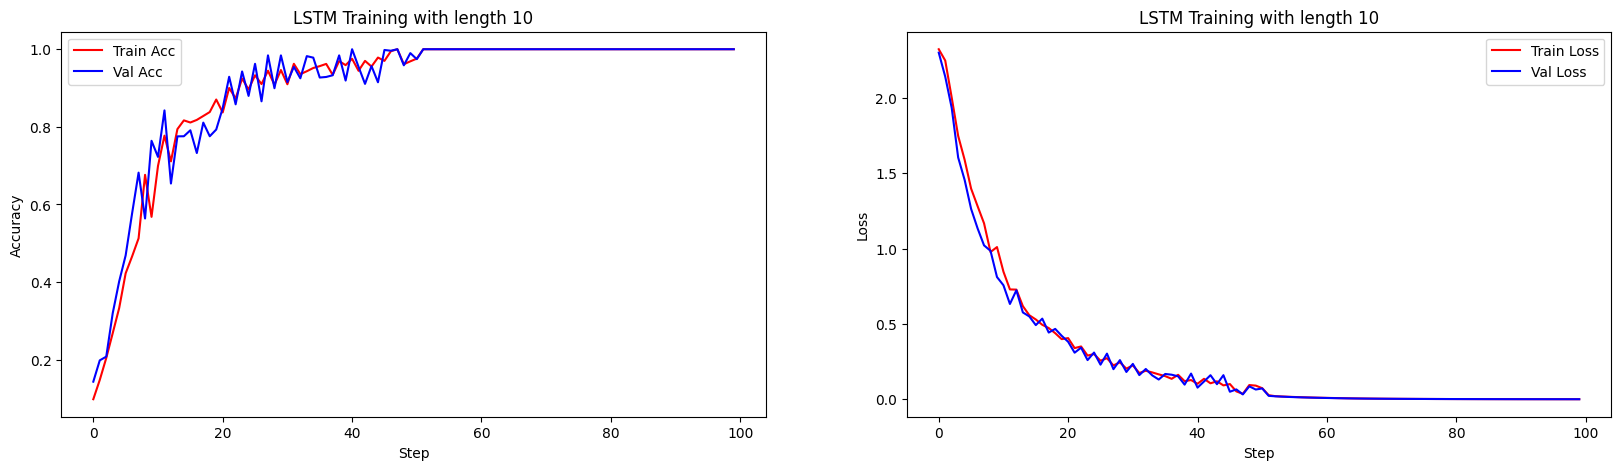

In [5]:
config.input_length = 10

model = 'VanillaRNN'
train_acces, train_losses, val_acces, val_losses = main(config, 'cuda', model)
steps = [i for i in range(len(train_acces))]
draw_eval(config, steps, train_acces, train_losses, val_acces, val_losses, model)

model = 'LSTM'
train_acces, train_losses, val_acces, val_losses = main(config, 'cuda', model)
steps = [i for i in range(len(train_acces))]
draw_eval(config, steps, train_acces, train_losses, val_acces, val_losses, model)

[0/13] Loss: 2.347388 (2.347388) Accuracy: 0.070312 (0.070312)
[10/13] Loss: 2.365974 (2.415049) Accuracy: 0.062500 (0.095881)
[0/4] Loss: 2.347972 (2.347972) Accuracy: 0.117188 (0.117188)
[0/13] Loss: 2.332470 (2.332470) Accuracy: 0.031250 (0.031250)
[10/13] Loss: 2.322161 (2.321678) Accuracy: 0.078125 (0.090199)
[0/4] Loss: 2.346026 (2.346026) Accuracy: 0.101562 (0.101562)
[0/13] Loss: 2.320077 (2.320077) Accuracy: 0.031250 (0.031250)
[10/13] Loss: 2.308596 (2.310226) Accuracy: 0.101562 (0.095881)
[0/4] Loss: 2.344707 (2.344707) Accuracy: 0.085938 (0.085938)
[0/13] Loss: 2.311682 (2.311682) Accuracy: 0.031250 (0.031250)
[10/13] Loss: 2.300099 (2.303516) Accuracy: 0.101562 (0.102983)
[0/4] Loss: 2.343763 (2.343763) Accuracy: 0.085938 (0.085938)
[0/13] Loss: 2.305370 (2.305370) Accuracy: 0.046875 (0.046875)
[10/13] Loss: 2.293514 (2.298385) Accuracy: 0.125000 (0.107955)
[0/4] Loss: 2.343227 (2.343227) Accuracy: 0.109375 (0.109375)
[0/13] Loss: 2.300172 (2.300172) Accuracy: 0.062500 (0.

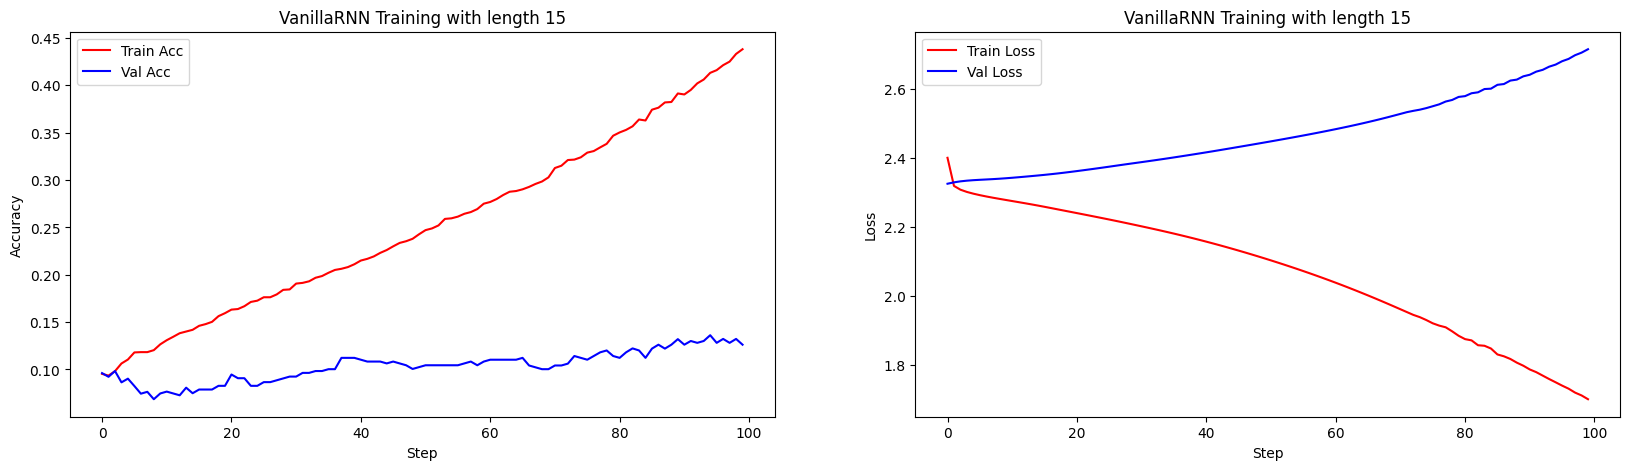

[0/13] Loss: 2.277983 (2.277983) Accuracy: 0.101562 (0.101562)
[10/13] Loss: 2.307621 (2.326874) Accuracy: 0.148438 (0.110795)
[0/4] Loss: 2.303194 (2.303194) Accuracy: 0.125000 (0.125000)
[0/13] Loss: 2.308676 (2.308676) Accuracy: 0.070312 (0.070312)
[10/13] Loss: 2.289111 (2.299628) Accuracy: 0.171875 (0.109375)
[0/4] Loss: 2.291204 (2.291204) Accuracy: 0.125000 (0.125000)
[0/13] Loss: 2.296920 (2.296920) Accuracy: 0.078125 (0.078125)
[10/13] Loss: 2.249546 (2.277391) Accuracy: 0.179688 (0.129972)
[0/4] Loss: 2.238489 (2.238489) Accuracy: 0.179688 (0.179688)
[0/13] Loss: 2.275948 (2.275948) Accuracy: 0.132812 (0.132812)
[10/13] Loss: 2.018310 (2.152388) Accuracy: 0.320312 (0.207386)
[0/4] Loss: 1.899197 (1.899197) Accuracy: 0.296875 (0.296875)
[0/13] Loss: 1.973617 (1.973617) Accuracy: 0.257812 (0.257812)
[10/13] Loss: 1.966922 (1.837784) Accuracy: 0.257812 (0.301136)
[0/4] Loss: 1.633305 (1.633305) Accuracy: 0.421875 (0.421875)
[0/13] Loss: 1.701867 (1.701867) Accuracy: 0.335938 (0.

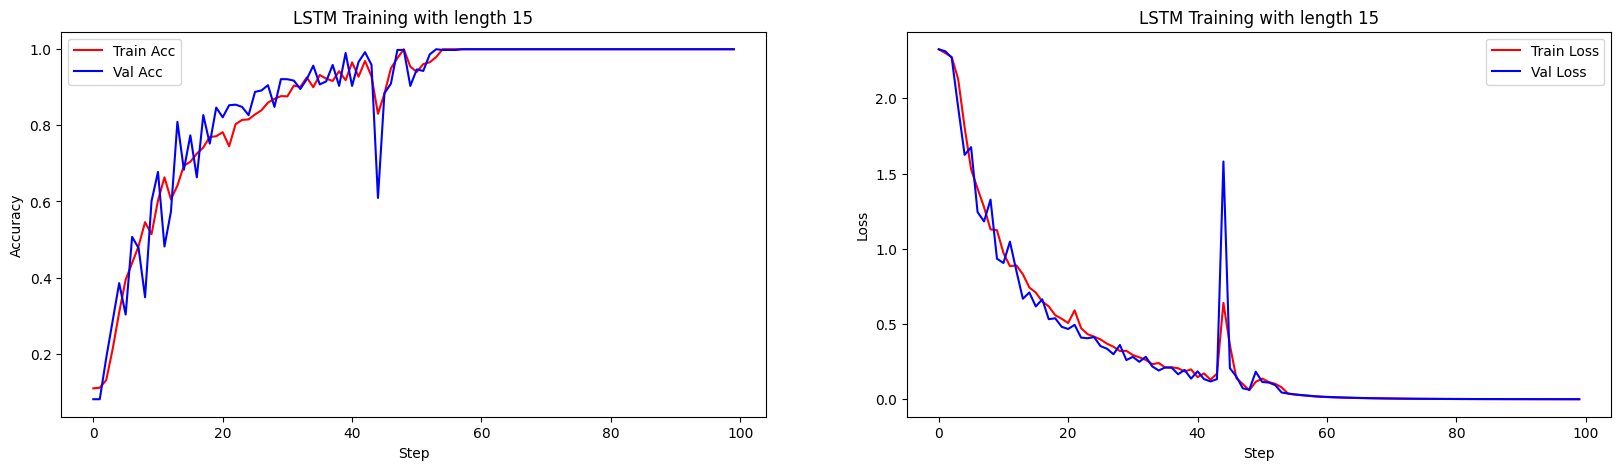

In [6]:
config.input_length = 15

model = 'VanillaRNN'
train_acces, train_losses, val_acces, val_losses = main(config, 'cuda', model)
steps = [i for i in range(len(train_acces))]
draw_eval(config, steps, train_acces, train_losses, val_acces, val_losses, model)

model = 'LSTM'
train_acces, train_losses, val_acces, val_losses = main(config, 'cuda', model)
steps = [i for i in range(len(train_acces))]
draw_eval(config, steps, train_acces, train_losses, val_acces, val_losses, model)

[0/13] Loss: 2.404284 (2.404284) Accuracy: 0.054688 (0.054688)
[10/13] Loss: 2.326014 (2.412024) Accuracy: 0.117188 (0.093750)
[0/4] Loss: 2.331434 (2.331434) Accuracy: 0.101562 (0.101562)
[0/13] Loss: 2.279047 (2.279047) Accuracy: 0.117188 (0.117188)
[10/13] Loss: 2.297674 (2.316055) Accuracy: 0.140625 (0.113636)
[0/4] Loss: 2.323359 (2.323359) Accuracy: 0.070312 (0.070312)
[0/13] Loss: 2.267802 (2.267802) Accuracy: 0.140625 (0.140625)
[10/13] Loss: 2.290218 (2.305761) Accuracy: 0.148438 (0.120739)
[0/4] Loss: 2.320225 (2.320225) Accuracy: 0.078125 (0.078125)
[0/13] Loss: 2.260760 (2.260760) Accuracy: 0.179688 (0.179688)
[10/13] Loss: 2.286206 (2.299289) Accuracy: 0.125000 (0.122159)
[0/4] Loss: 2.318166 (2.318166) Accuracy: 0.078125 (0.078125)
[0/13] Loss: 2.254960 (2.254960) Accuracy: 0.164062 (0.164062)
[10/13] Loss: 2.282373 (2.294391) Accuracy: 0.140625 (0.127131)
[0/4] Loss: 2.316527 (2.316527) Accuracy: 0.078125 (0.078125)
[0/13] Loss: 2.249423 (2.249423) Accuracy: 0.187500 (0.

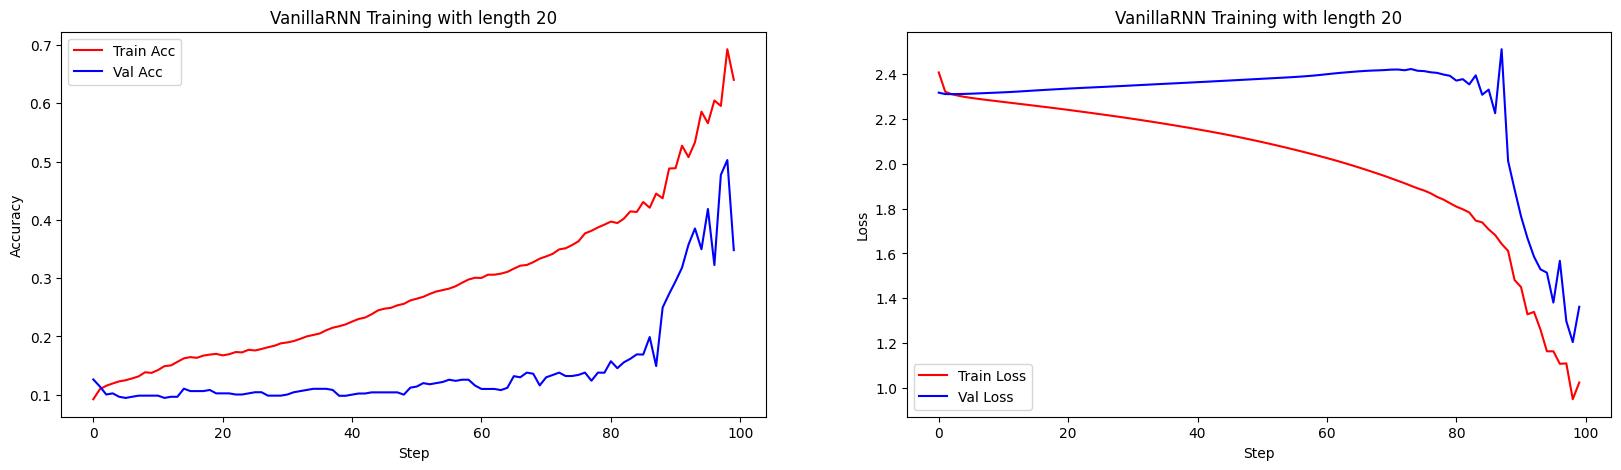

[0/13] Loss: 2.337661 (2.337661) Accuracy: 0.148438 (0.148438)
[10/13] Loss: 2.306370 (2.322252) Accuracy: 0.140625 (0.105114)
[0/4] Loss: 2.298999 (2.298999) Accuracy: 0.078125 (0.078125)
[0/13] Loss: 2.318552 (2.318552) Accuracy: 0.109375 (0.109375)
[10/13] Loss: 2.288260 (2.298100) Accuracy: 0.140625 (0.120739)
[0/4] Loss: 2.285048 (2.285048) Accuracy: 0.085938 (0.085938)
[0/13] Loss: 2.298374 (2.298374) Accuracy: 0.109375 (0.109375)
[10/13] Loss: 2.248952 (2.275844) Accuracy: 0.171875 (0.135653)
[0/4] Loss: 2.204881 (2.204881) Accuracy: 0.203125 (0.203125)
[0/13] Loss: 2.237470 (2.237470) Accuracy: 0.195312 (0.195312)
[10/13] Loss: 2.088331 (2.176535) Accuracy: 0.164062 (0.175426)
[0/4] Loss: 1.900565 (1.900565) Accuracy: 0.335938 (0.335938)
[0/13] Loss: 1.985834 (1.985834) Accuracy: 0.234375 (0.234375)
[10/13] Loss: 1.859088 (1.932725) Accuracy: 0.218750 (0.242188)
[0/4] Loss: 1.659511 (1.659511) Accuracy: 0.375000 (0.375000)
[0/13] Loss: 1.822875 (1.822875) Accuracy: 0.296875 (0.

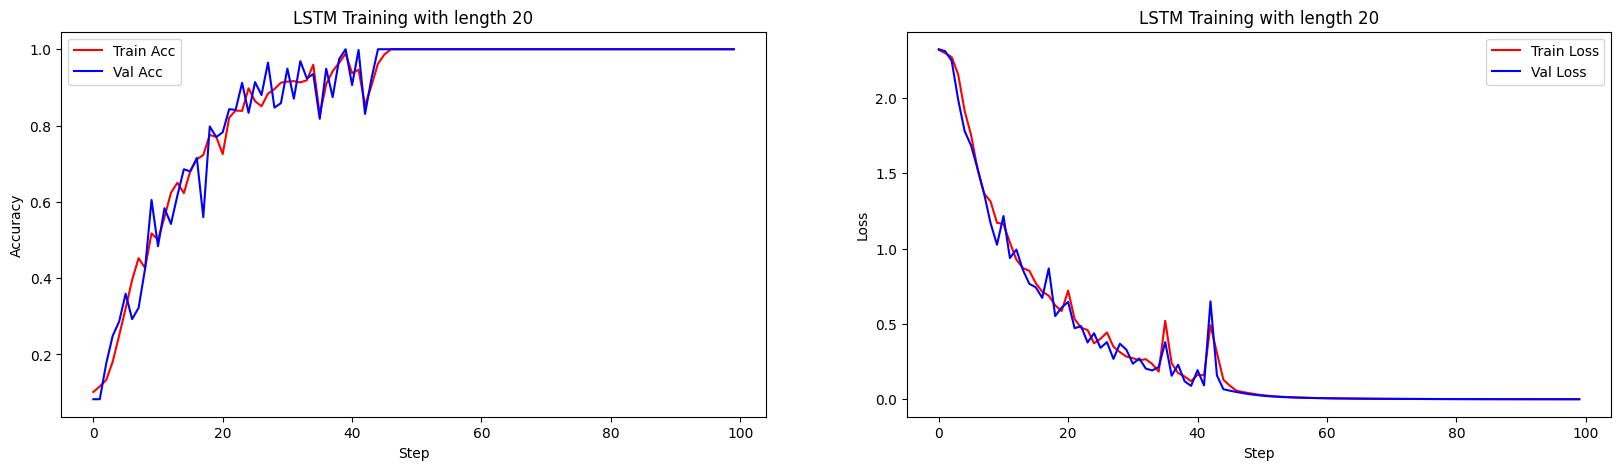

In [7]:
config.input_length = 20

model = 'VanillaRNN'
train_acces, train_losses, val_acces, val_losses = main(config, 'cuda', model)
steps = [i for i in range(len(train_acces))]
draw_eval(config, steps, train_acces, train_losses, val_acces, val_losses, model)

model = 'LSTM'
train_acces, train_losses, val_acces, val_losses = main(config, 'cuda', model)
steps = [i for i in range(len(train_acces))]
draw_eval(config, steps, train_acces, train_losses, val_acces, val_losses, model)